In [2]:
import pandas as pd

df = pd.read_csv("input/industry/train.csv")
TOTAL = len(df)
MAXIMUM_SAMPLES = 100000

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

def visualize(df):
    def plot(x_label, df, fig_size = (15,8), x_rotation=0):    
        plt.rc('font', family='NanumBarunGothic')
        sns.set(rc = {'figure.figsize':fig_size})
        sns.barplot(data=df, x=df.columns[0], y=df.columns[1])
        plt.xticks(rotation=x_rotation)
        plt.show()
        
    x_label = 'digit_3'
    count3_df = df[x_label].value_counts().reset_index()
    count3_df.columns=[x_label, 'Count']
    plot(x_label, count3_df, x_rotation=90, fig_size=(40,10))


비율 상관 없이 cut-off했을 때

In [94]:
CUT_OFF_THRESHOLD = 620
cut_df = df.groupby('digit_3', group_keys=False).apply(lambda x: x.sample(min(len(x), CUT_OFF_THRESHOLD)))
print(len(cut_df))

100357


In [95]:
def validate_na(x):
    count = 0
    if pd.isnull(x['text_obj']):
        count += 1
    if pd.isnull(x['text_mthd']):
        count += 1
    if pd.isnull(x['text_deal']):
        count += 1
    return count

df['nan_count'] = df.apply(validate_na, axis=1)
cut_df['nan_count'] = cut_df.apply(validate_na, axis=1)

In [102]:
NA_0 = len(df[df['nan_count'] == 0])
NA_1 = len(df[df['nan_count'] == 1])
NA_2 = len(df[df['nan_count'] == 2])
NA_3 = len(df[df['nan_count'] == 3])
print(NA_0, NA_0/TOTAL*100)
print(NA_1, NA_1/TOTAL*100)
print(NA_2, NA_2/TOTAL*100)
print(NA_3, NA_3/TOTAL*100)
print("------------ratio------------")
print(NA_1/NA_0)
print(NA_2/NA_0)
print(NA_3/NA_0)

925009 92.5009
22034 2.2034000000000002
52957 5.2957
0 0.0
------------ratio------------
0.023820308775374076
0.05725025378131456
0.0


In [103]:
CUT_NA_0 = len(cut_df[cut_df['nan_count'] == 0])
CUT_NA_1 = len(cut_df[cut_df['nan_count'] == 1])
CUT_NA_2 = len(cut_df[cut_df['nan_count'] == 2])
CUT_NA_3 = len(cut_df[cut_df['nan_count'] == 3])
print(CUT_NA_0, CUT_NA_0/TOTAL*100)
print(CUT_NA_1, CUT_NA_1/TOTAL*100)
print(CUT_NA_2, CUT_NA_2/TOTAL*100)
print(CUT_NA_3, CUT_NA_3/TOTAL*100)
print("------------ratio------------")
print(CUT_NA_1/CUT_NA_0)
print(CUT_NA_2/CUT_NA_0)
print(CUT_NA_3/CUT_NA_0)


88102 8.8102
6394 0.6394000000000001
5861 0.5861
0 0.0
------------ratio------------
0.07257496992122767
0.06652516401443781
0.0


비율 고려하여 cut-off했을 때

In [104]:
TRI_SAMPLES = MAXIMUM_SAMPLES * 0.925
BI_SAMPLES = MAXIMUM_SAMPLES * 0.022
UNI_SAMPLES = MAXIMUM_SAMPLES * 0.053

print(TRI_SAMPLES, BI_SAMPLES, UNI_SAMPLES)

92500.0 2200.0 5300.0


In [105]:
tri_df = df[df['nan_count'] == 0]
bi_df = df[df['nan_count'] == 1]
uni_df = df[df['nan_count'] == 2]

In [106]:
max_counts = [TRI_SAMPLES, BI_SAMPLES, UNI_SAMPLES]

cut_tri_df = tri_df.groupby('digit_3', group_keys=False).apply(lambda x: x.sample(min(len(x), 590)))
print(len(cut_tri_df), max_counts[0])
cut_bi_df = bi_df.groupby('digit_3', group_keys=False).apply(lambda x: x.sample(min(len(x), 13)))
print(len(cut_bi_df), max_counts[1])
cut_uni_df = uni_df.groupby('digit_3', group_keys=False).apply(lambda x: x.sample(min(len(x), 37)))
print(len(cut_uni_df), max_counts[2])

92432 92500.0
2257 2200.0
5320 5300.0


In [107]:
stratified_cut_df = pd.DataFrame()
stratified_cut_df = pd.concat([cut_tri_df, cut_bi_df, cut_uni_df])
stratified_cut_df

,Unnamed: 0,AI_id,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal,nan_count
438910,438910,id_0438911,A,1,11,육묘장,벼 재배,벼 모종,0
632234,632234,id_0632235,A,1,11,참다래나무를,비닐하우스에서,참다래재배,0
31961,31961,id_0031962,A,1,11,잔디재배,잔디,도.소매,0
871352,871352,id_0871353,A,1,11,법인에서,작물재배,"감자,양상추,벼",0
959622,959622,id_0959623,A,1,11,노지에서,일반소비자를대상으로,브루베리재배,0
...,...,...,...,...,...,...,...,...,...
675963,675963,id_0675964,S,96,969,NaN,사업장에코인세탁시설을갖추고일반소비자에게세탁기등제공,NaN,2
997791,997791,id_0997792,S,96,969,NaN,고객들이 직접와서 동전을 넣고 셀프로 빨래를 돌리는 코인세탁소,NaN,2
272282,272282,id_0272283,S,96,969,장례식장 및 장의관련 서비스업,NaN,NaN,2
408152,408152,id_0408153,S,96,969,NaN,철학관,NaN,2


In [113]:
STRA_NA_0 = len(stratified_cut_df[stratified_cut_df['nan_count'] == 0])
STRA_NA_1 = len(stratified_cut_df[stratified_cut_df['nan_count'] == 1])
STRA_NA_2 = len(stratified_cut_df[stratified_cut_df['nan_count'] == 2])
STRA_NA_3 = len(stratified_cut_df[stratified_cut_df['nan_count'] == 3])
print(STRA_NA_0, STRA_NA_0/TOTAL*100)
print(STRA_NA_1, STRA_NA_1/TOTAL*100)
print(STRA_NA_2, STRA_NA_2/TOTAL*100)
print(STRA_NA_3, STRA_NA_3/TOTAL*100)
print("------------ratio------------")
print(STRA_NA_1/STRA_NA_0)
print(STRA_NA_2/STRA_NA_0)
print(STRA_NA_3/STRA_NA_0)
print("\noriginal was ...")
print(NA_0, NA_0/TOTAL*100)
print(NA_1, NA_1/TOTAL*100)
print(NA_2, NA_2/TOTAL*100)
print(NA_3, NA_3/TOTAL*100)
print("------------ratio------------")
print(NA_1/NA_0)
print(NA_2/NA_0)
print(NA_3/NA_0)

92432 9.2432
2257 0.22569999999999998
5320 0.532
0 0.0
------------ratio------------
0.02441795049333564
0.05755582482257227
0.0

original was ...
925009 92.5009
22034 2.2034000000000002
52957 5.2957
0 0.0
------------ratio------------
0.023820308775374076
0.05725025378131456
0.0


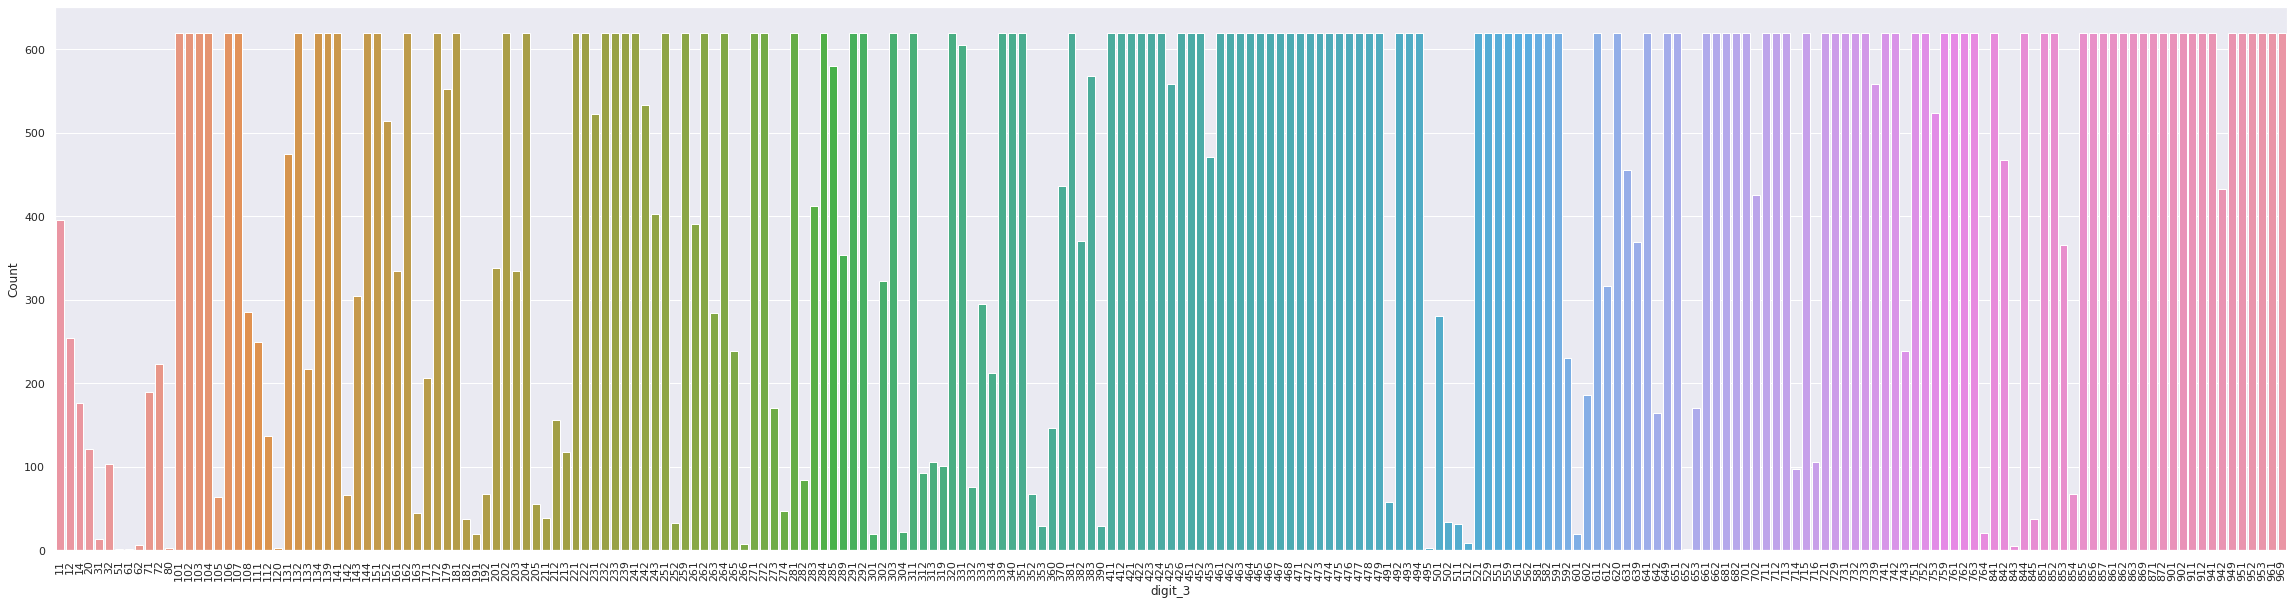

In [ ]:
visualize(cut_df)

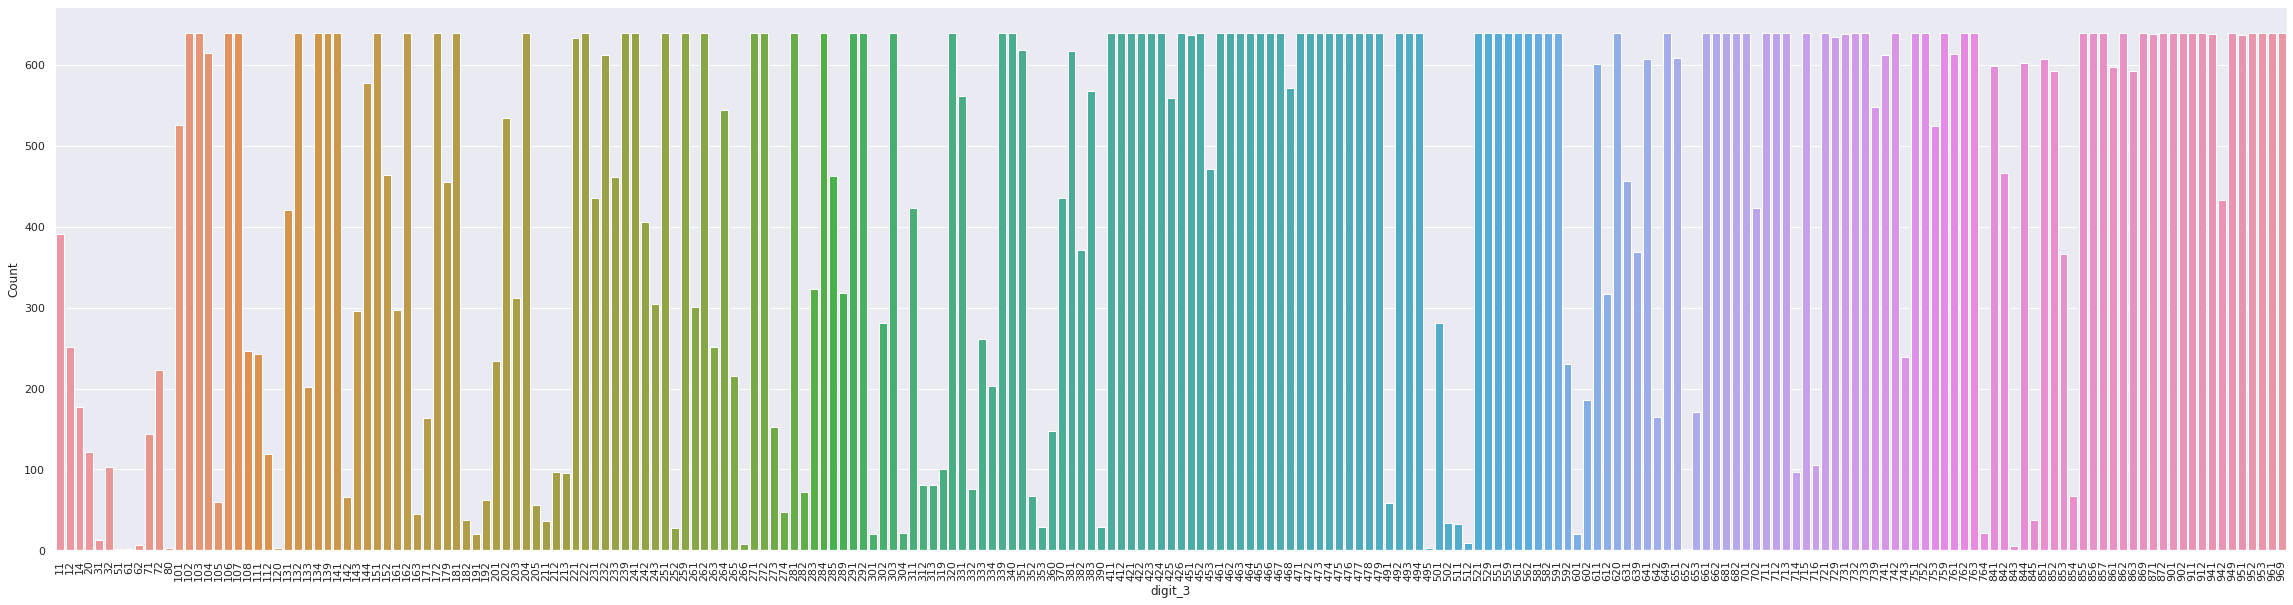

In [ ]:
visualize(stratified_cut_df)

In [120]:
stratified_cut_df

,Unnamed: 0,AI_id,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal,nan_count
438910,438910,id_0438911,A,1,11,육묘장,벼 재배,벼 모종,0
632234,632234,id_0632235,A,1,11,참다래나무를,비닐하우스에서,참다래재배,0
31961,31961,id_0031962,A,1,11,잔디재배,잔디,도.소매,0
871352,871352,id_0871353,A,1,11,법인에서,작물재배,"감자,양상추,벼",0
959622,959622,id_0959623,A,1,11,노지에서,일반소비자를대상으로,브루베리재배,0
...,...,...,...,...,...,...,...,...,...
675963,675963,id_0675964,S,96,969,NaN,사업장에코인세탁시설을갖추고일반소비자에게세탁기등제공,NaN,2
997791,997791,id_0997792,S,96,969,NaN,고객들이 직접와서 동전을 넣고 셀프로 빨래를 돌리는 코인세탁소,NaN,2
272282,272282,id_0272283,S,96,969,장례식장 및 장의관련 서비스업,NaN,NaN,2
408152,408152,id_0408153,S,96,969,NaN,철학관,NaN,2


In [122]:
stratified_cut_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [116]:
stratified_cut_df.to_csv("train_cufoff.csv", index=False)